In [37]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import RandomSampler

resize  = 16

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
composed = transforms.Compose([transforms.Resize((resize,resize)),transforms.ToTensor()])
train_data = datasets.MNIST(root ='./data/02/',
                            train=True,
                            download=True,
                            transform=composed)
test_data = datasets.MNIST(root='./data/02/',
                           train=False,
                           download=True,
                           transform=composed)

batch_size = 50
seed = 42
sampler = RandomSampler(train_data, generator=torch.Generator().manual_seed(seed))

train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size = batch_size, 
                                           sampler = sampler)

test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                           batch_size = batch_size, 
                                           shuffle = True)

In [38]:
data_iter = iter(train_loader)
data_item = next(data_iter)
data, target = data_item

print(data.shape)
print(target.shape)

torch.Size([50, 1, 16, 16])
torch.Size([50])


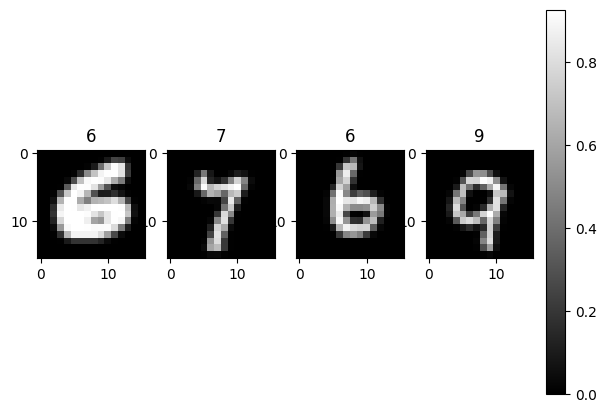

In [39]:
from matplotlib import pyplot as plt

stop = 4
fig = plt.figure()

for idx, (d, t) in enumerate(zip(data, target)) :
    ax = fig.add_subplot(1,stop,idx+1)
    ax.set_title(str(t.tolist()))
    im = ax.imshow(torch.squeeze(d), cmap='gray')
    if idx == stop - 1 :
        break
    
# add a colorbar
cax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
fig.colorbar(im, cax=cax)

# adjust subplot layout
fig.subplots_adjust(wspace=0.2)

# show the plot
plt.show()

Change the resolution of MNIST Data and Visualize it

torch.Size([50, 1, 28, 28])
torch.Size([50])


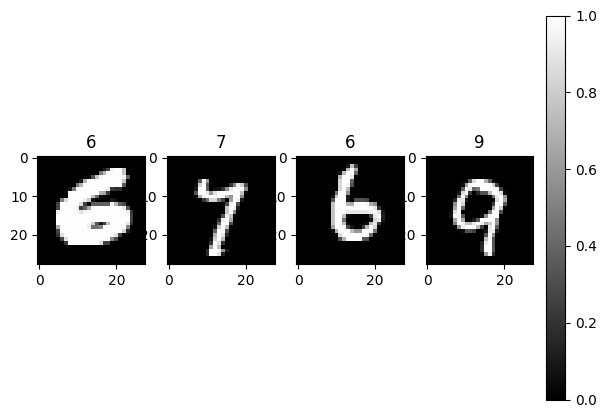

In [41]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import RandomSampler

resize  = 28

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
composed = transforms.Compose([transforms.Resize((resize,resize)),transforms.ToTensor()])
train_data = datasets.MNIST(root ='./data/02/',
                            train=True,
                            download=True,
                            transform=composed)
test_data = datasets.MNIST(root='./data/02/',
                           train=False,
                           download=True,
                           transform=composed)

batch_size = 50
seed = 42
sampler = RandomSampler(train_data, generator=torch.Generator().manual_seed(seed))

train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size = batch_size, 
                                           sampler = sampler)

test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                           batch_size = batch_size, 
                                           shuffle = True)

data_iter = iter(train_loader)
data_item = next(data_iter)
data, target = data_item

print(data.shape)
print(target.shape)

from matplotlib import pyplot as plt

stop = 4
fig = plt.figure()

for idx, (d, t) in enumerate(zip(data, target)) :
    ax = fig.add_subplot(1,stop,idx+1)
    ax.set_title(str(t.tolist()))
    im = ax.imshow(torch.squeeze(d), cmap='gray')
    if idx == stop - 1 :
        break
    
# add a colorbar
cax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
fig.colorbar(im, cax=cax)

# adjust subplot layout
fig.subplots_adjust(wspace=0.2)

# show the plot
plt.show()

Visualize weights in 2D

3.0 3.6997085
3.0001523 3.6996202


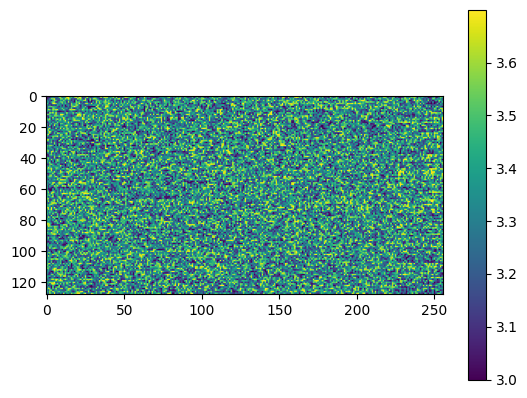

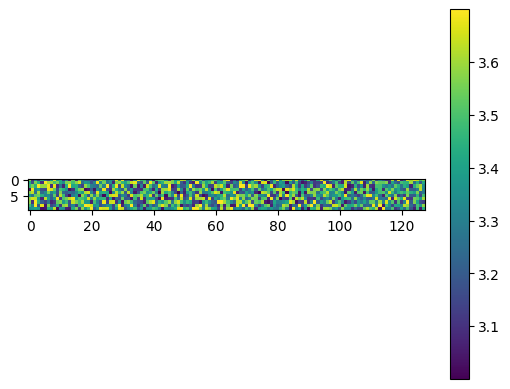

In [34]:
import torch
from matplotlib import pyplot as plt
import numpy as np

path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\04_18_21_22\model.pth"
model = torch.load(path)
model_state_dict = model['model_state_dict'] # odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])
fc1_weight = model_state_dict['fc1.weight']
fc2_weight = model_state_dict['fc2.weight']

print(np.min(fc1_weight.cpu().numpy()),np.max(fc1_weight.cpu().numpy()))
print(np.min(fc2_weight.cpu().numpy()),np.max(fc2_weight.cpu().numpy()))
plt.imshow(fc1_weight.cpu().numpy())
plt.colorbar()
plt.show()

plt.imshow(fc2_weight.cpu().numpy())
plt.colorbar()
plt.show()

Visualize weights in 3D

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np

path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\04_17_17_35\model.pth"
model = torch.load(path)
model_state_dict = model['model_state_dict'] # odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

fc1_weight = model_state_dict['fc1.weight'].cpu().numpy()
fc2_weight = model_state_dict['fc2.weight'].cpu().numpy()

for weights in [fc1_weight, fc2_weight] :
    # create X and Y grid
    X, Y = np.meshgrid(range(weights.shape[1]), range(weights.shape[0]))

    # create figure and 3D axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # plot surface
    ax.plot_surface(X, Y, weights, cmap='viridis')

    # set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Weight')

    # show plot
    plt.show()

In [73]:
import torch
from cnn import varFCN
from torchvision import datasets, transforms
from torch.utils.data import RandomSampler

def scale_weight(state_dict, scale=1) :
    for key in state_dict.keys() :
        state_dict[key] = state_dict[key] * scale
    return state_dict

path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\04_19_10_19\model_58.pth"

resize  = 16
seed = 42
batch_size = 50
activation = False
bias = False

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
composed = transforms.Compose([transforms.Resize((resize,resize)),transforms.ToTensor()])

test_data = datasets.MNIST(root='./data/02/',
                           train=False,
                           download=True,
                           transform=composed)

test_sampler = RandomSampler(test_data, generator=torch.Generator().manual_seed(seed))
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                           batch_size = batch_size, 
                                           sampler = test_sampler)

checkpoint = torch.load(path)
model_state_dict = checkpoint['model_state_dict']

model = varFCN(size= resize, activation=activation, bias=bias).to(device=device)
model.load_state_dict(model_state_dict)

model.eval()    # 평가시에는 dropout이 OFF 된다.
correct = 0
for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()
print('Test set Accuracy : {:.2f}%'.format(100. * correct / len(test_loader.dataset)))


# Scaled version
scale = (1.3034000000000001e-05+1.4482222222222221e-05)/2
scaled_model_state_dict = scale_weight(model_state_dict, scale=scale)

model = varFCN(size= resize, activation=activation, bias=bias).to(device=device)
model.load_state_dict(scaled_model_state_dict)

model.eval()    # 평가시에는 dropout이 OFF 된다.
correct = 0
for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()
print('Test set Accuracy : {:.2f}%'.format(100. * correct / len(test_loader.dataset)))


Test set Accuracy : 91.55%
Test set Accuracy : 91.55%


Normalize with respect to conductance data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

conductance_path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\memristor_data\conductance.csv"
data = pd.read_csv(conductance_path)
conduct = data['conductance']

# plt.plot(conduct)
# plt.title("conductance of memristor")
# plt.xlabel("Pulse Number")
# plt.ylabel("conductance [S]")

# Get the max and min values from conductance data
max_value = max(conduct)
min_value = min(conduct)

# Set offset ~5%
max_value = 0.95 * max_value
min_value = 0.95 * min_value



In [56]:
import torch
from matplotlib import pyplot as plt
import numpy as np

def scale_weight(state_dict, scale=1) :
    for key in state_dict.keys() :
        state_dict[key] = state_dict[key] * scale
    return state_dict

def check_scale(state_dict,conductance_path,scale,offset=0.05) :
    data = pd.read_csv(conductance_path)
    conduct = data['conductance']

    # Get the max and min values from conductance data
    max_con = max(conduct) * (1-offset)
    min_con = min(conduct) * (1-offset)
    
    for key in state_dict.keys() :
        weight = state_dict[key].cpu().numpy()
        min_state = np.min(weight)
        max_state = np.max(weight)
        print(min_con <= min_state * scale, max_state * scale <= max_con)


conductance_path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\memristor_data\conductance.csv"
weight_path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\04_19_09_37\model_31 copy.pth"

scale = (1.3034000000000001e-05+1.4482222222222221e-05)/2

model = torch.load(weight_path)
# bias should be False because memristor is only function of G (conductance) ... not I = G*V + b but I = G*V  
model_state_dict = model['model_state_dict'] # odict_keys(['fc1.weight','fc2.weight'])

fc1_weight = model_state_dict['fc1.weight'].cpu().numpy()
fc2_weight = model_state_dict['fc2.weight'].cpu().numpy()

check_scale(model_state_dict,conductance_path,scale=scale,offset=0.05)

True True
True True


In [33]:
conductance_path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\memristor_data\conductance.csv"
offset = 0.05

data = pd.read_csv(conductance_path)
conduct = data['conductance']

# Get the max and min values from conductance data
max_con = max(conduct) * (1-offset)
min_con = min(conduct) * (1-offset)

print(max_con/min_con)

1.2332361516034984


In [70]:
import numpy as np

a = np.array([2,3,1])
b = np.array([5,6,4])
sorted_index = a.argsort()
a= np.take_along_axis(a, sorted_index, axis=-1)
b= np.take_along_axis(b, sorted_index, axis=-1)
print(a)
print(b)

[1 2 3]
[4 5 6]


In [75]:
a = [(1,2),(3,4)]

for aa in a :
    print(aa[0])

1
3


In [ ]:
import os
import torch
from cnn import varFCN
from torchvision import datasets, transforms
from torch.utils.data import RandomSampler
import pickle

resize  = 28
seed = 42
batch_size = 50
activation = False
bias = False

def test(path, min, max, features : list ,activation, bias) :    
    is_cuda = torch.cuda.is_available()
    device = torch.device('cuda' if is_cuda else 'cpu')
    composed = transforms.Compose([transforms.Resize((resize,resize)),transforms.ToTensor()])

    test_data = datasets.MNIST(root='./data/02/',
                            train=False,
                            download=True,
                            transform=composed)

    test_sampler = RandomSampler(test_data, generator=torch.Generator().manual_seed(seed))
    test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                            batch_size = batch_size, 
                                            sampler = test_sampler)

    checkpoint = torch.load(path)
    model_state_dict = checkpoint['model_state_dict']

    model = varFCN(min=min,max=max,features=features,activation=activation,bias=bias).to(device=device)
    model.load_state_dict(model_state_dict)

    model.eval()    # 평가시에는 dropout이 OFF 된다.
    correct = 0
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        prediction = output.data.max(1)[1]
        correct += prediction.eq(target.data).sum()
    print('Test set Accuracy : {:.2f}%'.format(100. * correct / len(test_loader.dataset)))

path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\sweep4"
list_dir = os.listdir(path)
for p in [os.path.join(path,dir) for dir in list_dir] :
    print(os.path.basename(p))
    files = os.listdir(p)
    config = dict()
    for file in files :
        if file.endswith(".pickle") :
            with open(os.path.join(p,file),'rb') as f :
                config = pickle.load(f)
    for file in files :
        if file.endswith(".pth") :
            test(path=os.path.join(p,file),min=config['min_weight'],max=config['max_weight'],features=config['features'],activation=config['activation'],bias=config['bias'])

In [7]:
from pandas import DataFrame
import pickle
import os

path = r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\sweep4"
data = {"feature" : [], "min" : [], "model" : [], "accuracy" : []}
for root, dirs, files in os.walk(path) :
    config = dict()
    for file in files :
        if file.endswith(".pickle") :
            with open(os.path.join(root,file), 'rb') as f :
                config = pickle.load(f)
    for file in files :
        if file == "info.txt" :
            with open(os.path.join(root,file), 'r') as f:
                lines = f.readlines()
                for line in lines :
                    if ":" in line and "%" in line :
                        data['feature'].append(config['features'])
                        data['min'].append(config['min_weight'])
                        idx = line.find("'s")
                        data['model'].append(line[:idx])
                        idx = line.find(" : ")
                        data['accuracy'].append(line[idx+3:idx+7])
df = DataFrame(data)
# print(df.head(3))
df.to_csv(r"C:\Users\rholab\OneDrive - SNU\바탕 화면\Python\paper\Memristor\sweep4\0_result\result.csv",index=False)
                        
                        

[[1, 2, 3]]


In [1]:
import os

print(os.path.join("hello"))

hello
